In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-data


In [200]:
dfs = []
directory = r"names"
df = pd.DataFrame(columns=['Name', 'Sex', 'Count'])

for file_name in os.listdir(directory):
    if file_name.endswith('.txt'):
        file_path = os.path.join(directory, file_name)

        temp_df = pd.read_csv(file_path, names=df.columns)

        year = pd.to_datetime("1-1-" + (file_name.removeprefix('yob').removesuffix('.txt')), format='%d-%m-%Y')
        temp_df['Year'] = year
        dfs.append(temp_df)

df = pd.concat(dfs, ignore_index=True)

In [201]:
eigh = df[df['Name'].str.contains("eigh")]

Question, are eigh names really growing in popularity?

In [202]:
eighs_by_year = eigh.groupby(eigh['Year'].dt.year)['Count'].sum()
eighs_by_year = eighs_by_year.reset_index()
eighs_by_year.columns = ['Year', 'Count']
eighs_by_year

,Year,Count
0,1880,14
1,1881,11
2,1882,20
3,1883,17
4,1884,20
...,...,...
138,2018,16241
139,2019,17315
140,2020,16366
141,2021,16403


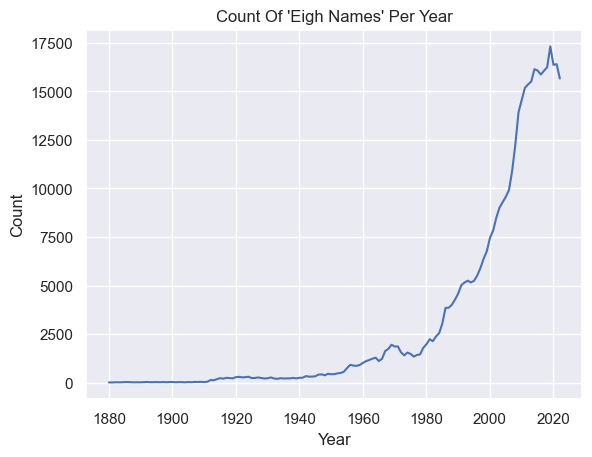

In [214]:


sns.set_theme(style="darkgrid")
sns.lineplot( x=eighs_by_year['Year'], y=eighs_by_year['Count'])
plt.title("Count Of 'Eigh Names' Per Year")
plt.show()

Is that just population growth or are the names really becoming more common?

In [206]:
uspop = pd.read_csv(r"population_usafacts.csv")
uspop = uspop.rename(columns={'Years': 'Population'})
uspop = uspop.iloc[0].to_frame().T
melted_uspop = pd.melt(uspop, var_name='Year', value_name='Value')
melted_uspop = melted_uspop.iloc[1:]

eighs_by_year['Year'] = eighs_by_year['Year'].astype(int)
melted_uspop['Year'] = melted_uspop['Year'].astype(int)

#Combine dataframes on year

merged_df = eighs_by_year.merge(melted_uspop, on='Year')



merged_df['eighs_per_capita'] = merged_df['Count'].astype(int) / merged_df['Value'].astype(int)
merged_df['eighs_per_100k'] = merged_df['eighs_per_capita'] * 100000



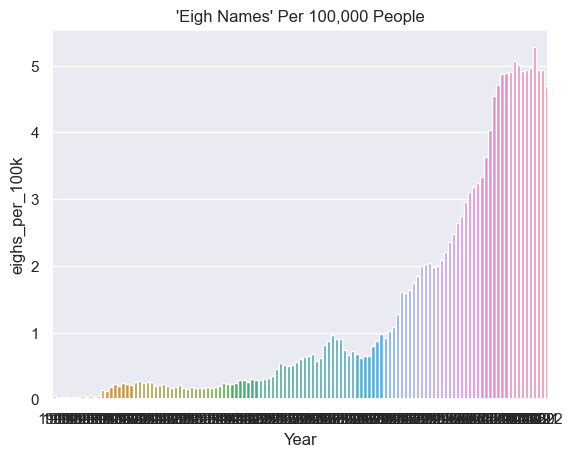

In [216]:
sns.set_theme(style="darkgrid")
sns.barplot( x=merged_df['Year'], y=merged_df['eighs_per_100k'])
plt.title("'Eigh Names' Per 100,000 People")
plt.show()

From Reddit: Doesn't it seem like girls are getting all the eighs?

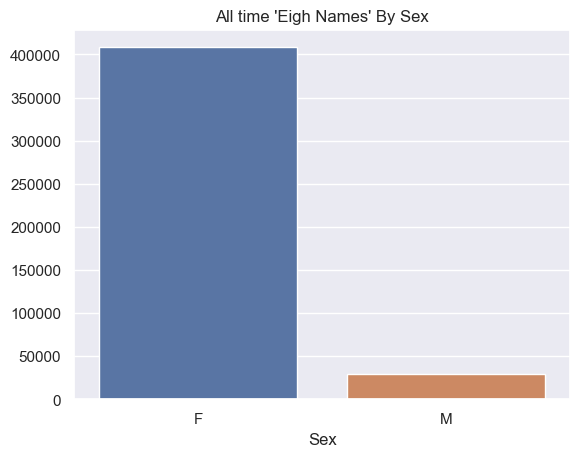

In [217]:
sex_grouped = eigh.groupby(eigh['Sex'])['Count'].sum()
sex_grouped

sns.barplot( x=sex_grouped.index, y=sex_grouped.values)
plt.title("All time 'Eigh Names' By Sex")
plt.show()


What are the most popular eighs per year?

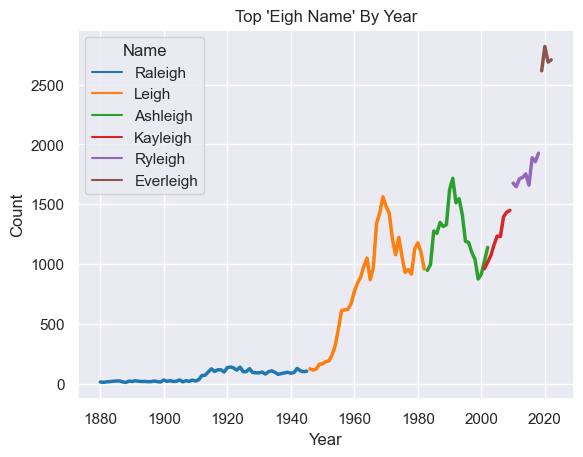

In [237]:
top_eigh_by_year = eigh.groupby('Year')['Count'].idxmax().apply(lambda x: df.loc[x])
sns.lineplot(data=top_eigh_by_year, x='Year', y='Count', hue='Name',palette="tab10", linewidth=2.5)
plt.title("Top 'Eigh Name' By Year")
plt.show()

All time?

In [210]:
top_10_eighs_all_time = eigh.sort_values(by='Count', ascending=False)['Name'].unique()
top_10_eighs_all_time[0:9]



array(['Everleigh', 'Ryleigh', 'Ashleigh', 'Leigh', 'Kayleigh', 'Kyleigh',
       'Leighton', 'Haleigh', 'Charleigh'], dtype=object)

<b><h3>EVERLEIGH</h3></b>

The least popular eigh names?

In [211]:
bot_10_eighs_all_time = eigh.sort_values(by='Count', ascending=True)['Name'].unique()
bot_10_eighs_all_time[0:9]

array(['Journeigh', 'Kayleigha', 'Joeleigh', 'Coleigh', 'Kaizleigh',
       'Keleigh', 'Kelleigh', 'Chesleigh', 'Braileigh'], dtype=object)

<H3><B> JOURNEIGH </B></H3>
Carry on my weighward son.